In [1]:
!pip install opencv-python


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov  4 17:10:20 2020

@author: Tagore Pothuneedi
@data pre-processing:PJ
"""

import matplotlib.pyplot as plt #to plot required plots
from skimage.transform import resize #to resize image 
from skimage.util import pad #to pad values in numpy array
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os #to get paths of images
import cv2 #to read images
from sklearn.decomposition import PCA



#function used to show the image
def show_image(image_path,title='Image',cmap_type='gray'):
    img_grey = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_grey,cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

# function to get all file paths from provided directory
def get_list_of_files(dir_path):
    # create a list of file and sub directories 
    # names in the given directory 
    files = os.listdir(dir_path)
    all_files = list()
    # Iterate over all the entries
    for file in files:
        # Create full path
        fullPath = os.path.join(dir_path, file)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            all_files = all_files + get_list_of_files(fullPath)
        else:
            all_files.append(fullPath)
                
    return all_files

#function to get folder names from provided path : folder name is later used as target label
def get_folder_name_list(dir_path):
   base_path_folder_list=[]
   for entry in os.listdir(dir_path):
       if os.path.isdir(os.path.join(dir_path, entry)):
           base_path_folder_list.append(entry) 
   return base_path_folder_list

#white padding : padwithone black padding:pad with zero
#used in preprocessing of image, for adding 2 pixel border from all sides
def padwithzeros(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    return vector

def pre_process_image(img_path):
    #show_image(img_path,'greyimg')
    img_grey = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
        
    # define a threshold, 128 is the middle of black and white in grey scale
    thresh = 128
    
    # threshold the image
    img_binary = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)[1]
    
    #invert the binary image to get clear image
    inverted_binary_image =  cv2.bitwise_not(img_binary)
    fimg = np.where(inverted_binary_image>0,1,inverted_binary_image)
    
    
    '''
    # can be used when image is not 32 * 32 pixel 
    resized_img = resize(inverted_binary_image,(28,28),anti_aliasing=False) # second parameter : scale here 2 double the size
    resized_img_with_padding = pad(resized_img,2,padwithzeros)
    fimg = np.where(resized_img_with_padding>0,1,resized_img_with_padding)
    '''
    #normalized_fimg = fimg / np.linalg.norm(fimg)
    normalized_fimg = fimg 
    
    #filters
    #sobelx = cv2.Sobel(fimg,cv2.CV_64F,1,0,ksize=5)
    #sobely = cv2.Sobel(fimg,cv2.CV_64F,0,1,ksize=5)
    #laplacian = cv2.Laplacian(fimg,cv2.CV_64F)
    
    return normalized_fimg.flatten()

#get list of preprocessed images
def load_images_list(img_paths):
    images=[]
    for img_path in img_paths:
        fimg = pre_process_image(img_path)
        images.append(fimg)
    return images

# base path for dataset
base_path=r"C:\Users\tagor\Desktop\ml\DevanagariHandwrittenCharacterDataset\Train"



#base_path_folder_list = get_folder_name_list(base_path)    
#print(base_path_folder_list)


#base_path_folder_list=['character_1_ka','character_2_kha','character_3_ga','character_4_gha','character_5_kna']
base_path_folder_list=['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']

df = pd.DataFrame()
i=0
for folder_name in base_path_folder_list:
    img_path=base_path+'/'+folder_name+'/'
    images_path_list = get_list_of_files(img_path)
    images_flattened = load_images_list(images_path_list)
    df_images = pd.DataFrame(images_flattened)
    df_images['label'] = i
    i+=1
    
    ##subdivide
    ##astract
    
    df=df.append(df_images,ignore_index=True)
    

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#shuffle records in df
df = df.sample(frac = 1) 
X=df.iloc[:,df.columns != 'label']
y=df['label']


X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.2,random_state=1111,stratify=y)


#testing random image
test_base_path = r'C:\Users\tagor\Desktop\ml\DevanagariHandwrittenCharacterDataset\Test'
test_img_path=test_base_path+'digit_7/5771.png'


def test_char(img_path):
    test_img = pre_process_image(img_path)
    test_img=test_img.reshape(1,-1)
    print("rfc: {0}".format(rfc.predict(test_img)))
    #print("dtree_model: {0}".format(dtree_model.predict(test_img)))
    print("svm_model_linear: {0}".format(svm_model_linear.predict(test_img)))
    print("knn: {0}".format(knn.predict(test_img)))
    print("gnb: {0}".format(gnb.predict(test_img)))
    
    



"    \nmisclassified_img = X_test[y_test != rfc_predictions][:30]\ncorrect_lab = y_test[y_test != rfc_predictions][:30].to_numpy()\nmisclassified_lab = rfc_predictions[y_test != rfc_predictions][:30]\n\n\nfig,ax = plt.subplots(nrows=10,ncols=3, sharex=True, sharey=True,figsize=(30,30))\nax= ax.flatten()\n\nfor i in range(30):\n    img = misclassified_img.iloc[i].values.reshape(32,32)\n    ax[i].imshow(img,cmap='Greys',interpolation='nearest')\n    ax[i].set_title('%d) t: %s p: %s'%(i+1, correct_lab[i],misclassified_lab[i]))\n    \nax[0].set_xticks([])\nax[0].set_yticks([])\nplt.tight_layout()\nplt.show()\n"

In [2]:

##################
#CNN 
##################
import tensorflow as tf
import keras
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from keras.layers.core import Activation
from keras.models import Sequential

import keras.backend as K
#from keras.backend.tensorflow_backend import get_session as sess

In [3]:
X_train.shape,X.shape

((13600, 1024), (17000, 1024))

In [4]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 32,32

# the data, split between train and test sets

x_train = np.asarray(X_train).reshape(13600,32,32,1)
x_test = np.asarray(X_test).reshape(3400,32,32,1)

#x_train = X_train
#x_test = X_test

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train shape: (13600, 32, 32, 1)
13600 train samples
3400 test samples


In [5]:
from keras.backend import sigmoid,tanh,exp
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation

def swish(x, beta = 2):
    return (x * sigmoid(beta * x))
def param_tanh(x):
    return x+tanh(x)
def relu_moid(x):
    #if x > 0.0:
    #    return x
    #else:
    #    return 1/1+exp(-x)

    return K.switch(x>0,x,sigmoid(x))

def param_sigmoid(x):
    return x/(1+exp(-x))
    #print(x)
    
    

get_custom_objects().update({'swish': Activation(swish)})
get_custom_objects().update({'param_tanh': Activation(param_tanh)})
get_custom_objects().update({'relu_moid': Activation(relu_moid)})
get_custom_objects().update({'param_sigmoid': Activation(param_sigmoid)})

# Relu_moid

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu_moid',input_shape=(32,32,1)))
model.add(Conv2D(64, (3, 3), activation='relu_moid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu_moid'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
list_of_scores={}

In [14]:
#optimizer=keras.optimizers.Adadelta(),
x_test.shape,y_test.shape,x_train.shape,y_train.shape

((3400, 32, 32, 1), (3400, 10), (13600, 32, 32, 1), (13600, 10))

Epoch 1/12
107/107 [==============================] - 16s 146ms/step - loss: 2.5296 - accuracy: 0.1008 - precision: 0.1008 - recall: 0.0038 - auc: 0.5066 - val_loss: 2.3021 - val_accuracy: 0.1000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5007
Epoch 2/12
107/107 [==============================] - 15s 141ms/step - loss: 2.3028 - accuracy: 0.0965 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5030 - val_loss: 2.3000 - val_accuracy: 0.1000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5170
Epoch 3/12
107/107 [==============================] - 15s 138ms/step - loss: 2.3032 - accuracy: 0.1102 - precision: 0.0526 - recall: 7.3529e-05 - auc: 0.5118 - val_loss: 2.3350 - val_accuracy: 0.1000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5317
Epoch 4/12
107/107 [==============================] - 15s 138ms/step - loss: 2.2144 - accuracy: 0.1401 - precision: 0.8715 - recall: 0.0115 - auc: 0.5821 - val_loss: 1.5046 - val_accuracy

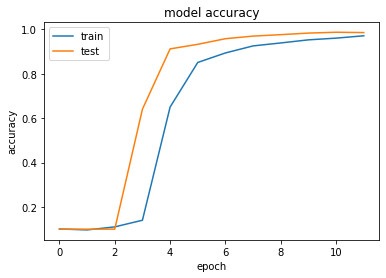

In [15]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy','Precision','Recall','AUC'])
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
list_of_scores['relu_moid']=[]
list_of_scores['relu_moid'].append(score[1])
list_of_scores['relu_moid'].append(score[2])
list_of_scores['relu_moid'].append(score[3])
list_of_scores['relu_moid'].append(score[4])
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# param_tanh

In [28]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3),activation='param_tanh',input_shape=(32,32,1)))
model1.add(Conv2D(64, (3, 3), activation='param_tanh'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128, activation='param_tanh'))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax'))


Epoch 1/12
107/107 [==============================] - 14s 129ms/step - loss: 1.4476 - accuracy: 0.8193 - precision: 0.8273 - recall: 0.8160 - auc: 0.9474 - val_loss: 0.2820 - val_accuracy: 0.9306 - val_precision: 0.9332 - val_recall: 0.9285 - val_auc: 0.9900
Epoch 2/12
107/107 [==============================] - 13s 126ms/step - loss: 0.3041 - accuracy: 0.9187 - precision: 0.9227 - recall: 0.9160 - auc: 0.9897 - val_loss: 0.1621 - val_accuracy: 0.9585 - val_precision: 0.9621 - val_recall: 0.9565 - val_auc: 0.9957
Epoch 3/12
107/107 [==============================] - 13s 125ms/step - loss: 0.1914 - accuracy: 0.9493 - precision: 0.9518 - recall: 0.9465 - auc: 0.9947 - val_loss: 0.1294 - val_accuracy: 0.9626 - val_precision: 0.9659 - val_recall: 0.9594 - val_auc: 0.9964
Epoch 4/12
107/107 [==============================] - 13s 124ms/step - loss: 0.1350 - accuracy: 0.9582 - precision: 0.9617 - recall: 0.9561 - auc: 0.9969 - val_loss: 0.1010 - val_accuracy: 0.9729 - val_precision: 0.9755 - v

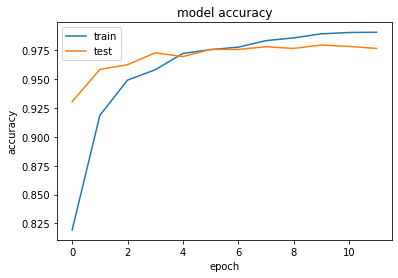

In [29]:
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy','Precision','Recall','AUC'])
history=model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
list_of_scores['param_tanh']=[]
list_of_scores['param_tanh'].append(score[1])
list_of_scores['param_tanh'].append(score[2])
list_of_scores['param_tanh'].append(score[3])
list_of_scores['param_tanh'].append(score[4])
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# param_sigmoid

In [30]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),activation='param_sigmoid',input_shape=(32,32,1)))
model2.add(Conv2D(64, (3, 3), activation='param_sigmoid'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='param_sigmoid'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))


Epoch 1/12
107/107 [==============================] - 18s 166ms/step - loss: 0.4872 - accuracy: 0.8504 - precision: 0.9217 - recall: 0.7826 - auc: 0.9858 - val_loss: 0.1349 - val_accuracy: 0.9600 - val_precision: 0.9698 - val_recall: 0.9538 - val_auc: 0.9978
Epoch 2/12
107/107 [==============================] - 18s 167ms/step - loss: 0.1536 - accuracy: 0.9513 - precision: 0.9598 - recall: 0.9437 - auc: 0.9977 - val_loss: 0.0836 - val_accuracy: 0.9729 - val_precision: 0.9769 - val_recall: 0.9706 - val_auc: 0.9990
Epoch 3/12
107/107 [==============================] - 17s 156ms/step - loss: 0.1006 - accuracy: 0.9679 - precision: 0.9730 - recall: 0.9643 - auc: 0.9987 - val_loss: 0.0618 - val_accuracy: 0.9803 - val_precision: 0.9826 - val_recall: 0.9791 - val_auc: 0.9992
Epoch 4/12
107/107 [==============================] - 17s 155ms/step - loss: 0.0675 - accuracy: 0.9792 - precision: 0.9829 - recall: 0.9766 - auc: 0.9993 - val_loss: 0.0488 - val_accuracy: 0.9838 - val_precision: 0.9847 - v

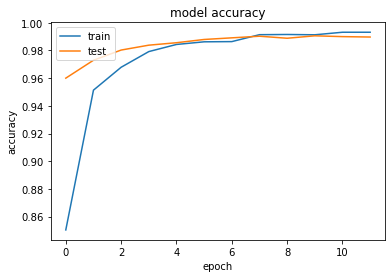

In [31]:
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy','Precision','Recall','AUC'])
history=model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
list_of_scores['param_sigmoid']=[]
list_of_scores['param_sigmoid'].append(score[1])
list_of_scores['param_sigmoid'].append(score[2])
list_of_scores['param_sigmoid'].append(score[3])
list_of_scores['param_sigmoid'].append(score[4])
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Relu

In [38]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,1)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))


Epoch 1/12
107/107 [==============================] - 12s 115ms/step - loss: 0.7382 - accuracy: 0.7605 - precision: 0.8896 - recall: 0.6547 - auc: 0.9686 - val_loss: 0.1520 - val_accuracy: 0.9556 - val_precision: 0.9682 - val_recall: 0.9412 - val_auc: 0.9984
Epoch 2/12
107/107 [==============================] - 13s 119ms/step - loss: 0.2358 - accuracy: 0.9235 - precision: 0.9426 - recall: 0.9038 - auc: 0.9957 - val_loss: 0.0837 - val_accuracy: 0.9759 - val_precision: 0.9819 - val_recall: 0.9709 - val_auc: 0.9990
Epoch 3/12
107/107 [==============================] - 13s 119ms/step - loss: 0.1509 - accuracy: 0.9528 - precision: 0.9633 - recall: 0.9429 - auc: 0.9979 - val_loss: 0.0586 - val_accuracy: 0.9803 - val_precision: 0.9834 - val_recall: 0.9771 - val_auc: 0.9992
Epoch 4/12
107/107 [==============================] - 12s 117ms/step - loss: 0.1194 - accuracy: 0.9607 - precision: 0.9698 - recall: 0.9527 - auc: 0.9986 - val_loss: 0.0478 - val_accuracy: 0.9862 - val_precision: 0.9894 - v

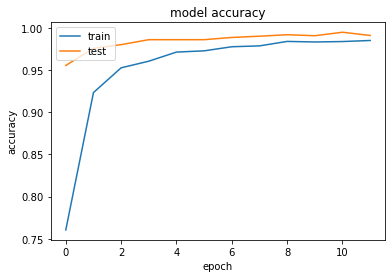

In [39]:
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy','Precision','Recall','AUC'])
history=model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
list_of_scores['relu']=[]
list_of_scores['relu'].append(score[1])
list_of_scores['relu'].append(score[2])
list_of_scores['relu'].append(score[3])
list_of_scores['relu'].append(score[4])
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# tanh

In [48]:
model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3),activation='tanh',input_shape=(32,32,1)))
model4.add(Conv2D(64, (3, 3), activation='tanh'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(128, activation='tanh'))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))


Epoch 1/12
107/107 [==============================] - 12s 115ms/step - loss: 0.4871 - accuracy: 0.8505 - precision: 0.9118 - recall: 0.8085 - auc: 0.9840 - val_loss: 0.1694 - val_accuracy: 0.9494 - val_precision: 0.9639 - val_recall: 0.9424 - val_auc: 0.9973
Epoch 2/12
107/107 [==============================] - 12s 111ms/step - loss: 0.1762 - accuracy: 0.9453 - precision: 0.9568 - recall: 0.9354 - auc: 0.9975 - val_loss: 0.1162 - val_accuracy: 0.9668 - val_precision: 0.9758 - val_recall: 0.9597 - val_auc: 0.9985
Epoch 3/12
107/107 [==============================] - 12s 111ms/step - loss: 0.1158 - accuracy: 0.9649 - precision: 0.9735 - recall: 0.9585 - auc: 0.9988 - val_loss: 0.0843 - val_accuracy: 0.9759 - val_precision: 0.9813 - val_recall: 0.9721 - val_auc: 0.9990
Epoch 4/12
107/107 [==============================] - 12s 112ms/step - loss: 0.0823 - accuracy: 0.9769 - precision: 0.9818 - recall: 0.9723 - auc: 0.9991 - val_loss: 0.0770 - val_accuracy: 0.9765 - val_precision: 0.9804 - v

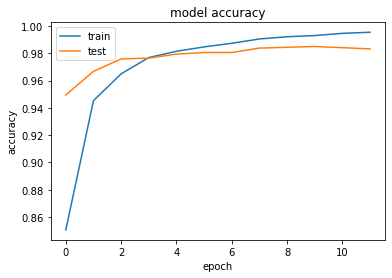

In [49]:
model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy','Precision','Recall','AUC'])
history=model4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
list_of_scores['tanh']=[]
list_of_scores['tanh'].append(score[1])
list_of_scores['tanh'].append(score[2])
list_of_scores['tanh'].append(score[3])
list_of_scores['tanh'].append(score[4])
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Sigmoid

In [45]:
model5 = Sequential()
model5.add(Conv2D(32, kernel_size=(3, 3),activation='sigmoid',input_shape=(32,32,1)))
model5.add(Conv2D(64, (3, 3), activation='sigmoid'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(128, activation='sigmoid'))
model5.add(Dropout(0.5))
model5.add(Dense(10, activation='softmax'))


Epoch 1/12
107/107 [==============================] - 12s 112ms/step - loss: 2.5929 - accuracy: 0.1022 - precision: 0.0621 - recall: 7.3529e-04 - auc: 0.5005 - val_loss: 2.3059 - val_accuracy: 0.1000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 2/12
107/107 [==============================] - 11s 107ms/step - loss: 2.4295 - accuracy: 0.0973 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4968 - val_loss: 2.3058 - val_accuracy: 0.1000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 3/12
107/107 [==============================] - 12s 108ms/step - loss: 2.3775 - accuracy: 0.0969 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5019 - val_loss: 2.3035 - val_accuracy: 0.1000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 4/12
107/107 [==============================] - 12s 108ms/step - loss: 2.3512 - accuracy: 0.0999 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4995 - val_loss: 2.304

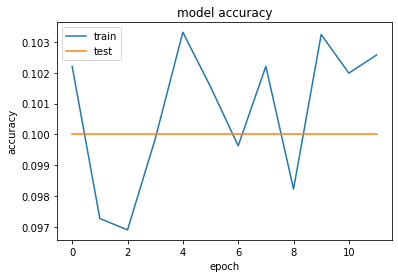

In [46]:
model5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy','Precision','Recall','AUC'])
history=model5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
list_of_scores['sigmoid']=[]
list_of_scores['sigmoid'].append(score[1])
list_of_scores['sigmoid'].append(score[2])
list_of_scores['sigmoid'].append(score[3])
list_of_scores['sigmoid'].append(score[4])
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Visualizing results

In [50]:

activation=list(list_of_scores.keys())
metrics=list(list_of_scores.values())

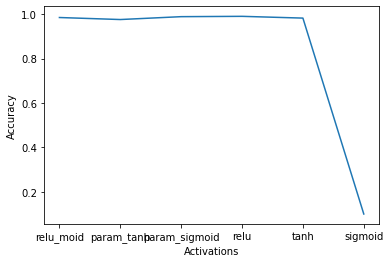

In [51]:
import seaborn as sns
ax=sns.lineplot(x=activation,y=[item[0] for item in metrics])
ax.set(xlabel='Activations', ylabel='Accuracy')
plt.show()

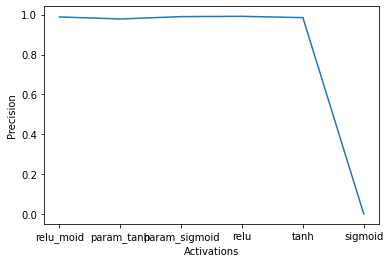

In [52]:
ax=sns.lineplot(x=activation,y=[item[1] for item in metrics])
ax.set(xlabel='Activations', ylabel='Precision')
plt.show()

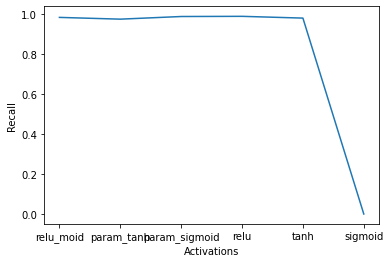

In [53]:
ax=sns.lineplot(x=activation,y=[item[2] for item in metrics])
ax.set(xlabel='Activations', ylabel='Recall')
plt.show()

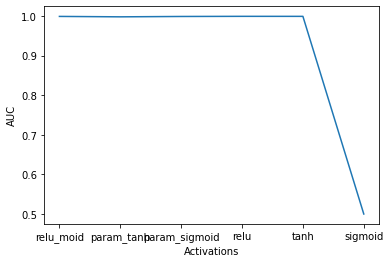

In [54]:
ax=sns.lineplot(x=activation,y=[item[3] for item in metrics])
ax.set(xlabel='Activations', ylabel='AUC')
plt.show()

In [56]:
list_of_scores

{'relu_moid': [0.9858823418617249,
  0.9887806177139282,
  0.9850000143051147,
  0.9991468787193298],
 'param_tanh': [0.9767646789550781,
  0.9784787893295288,
  0.9761765003204346,
  0.9980998635292053],
 'param_sigmoid': [0.9897058606147766,
  0.9902855753898621,
  0.9894117712974548,
  0.9990007281303406],
 'relu': [0.9911764860153198,
  0.991752564907074,
  0.9902940988540649,
  0.9993458986282349],
 'tanh': [0.9832352995872498,
  0.9852376580238342,
  0.9814705848693848,
  0.9992913007736206],
 'sigmoid': [0.10000000149011612, 0.0, 0.0, 0.5]}